NON-PARAMETRIC LOCALLY WEIGHTED REGRESSION ALGORITHM

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def local_regression(x0,X,y,tau):
    x0=np.r_[1,x0] 
    X=np.c_[np.ones(len(X)),X]
    xw=X.T*radial_kernel(x0,X,tau)
    beta=np.linalg.pinv(xw @ X) @ xw @ y
    return x0 @ beta
# # fit model: normal equations with kernel

In [27]:
print(np.r_[np.array([1,2,3]),0,0,0,np.array([4,5,6])])
#Translates slice objects to concatenation along the first axis
print(np.c_[np.array([1,2,3]),np.array([4,5,6])])
#Translates slice objects to concatenation along the second axis.

[1 2 3 0 0 0 4 5 6]
[[1 4]
 [2 5]
 [3 6]]


In [13]:
def radial_kernel(x0,X,tau):
    return np.exp(np.sum((X-x0)**2,axis=1)/(-2*tau*tau))
     

In [15]:
data=pd.read_csv("tips.csv")
print(data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [16]:
bill=data.total_bill.values
print(bill)

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.

In [17]:
tip=data.tip.values
print(tip)

[ 1.01  1.66  3.5   3.31  3.61  4.71  2.    3.12  1.96  3.23  1.71  5.
  1.57  3.    3.02  3.92  1.67  3.71  3.5   3.35  4.08  2.75  2.23  7.58
  3.18  2.34  2.    2.    4.3   3.    1.45  2.5   3.    2.45  3.27  3.6
  2.    3.07  2.31  5.    2.24  2.54  3.06  1.32  5.6   3.    5.    6.
  2.05  3.    2.5   2.6   5.2   1.56  4.34  3.51  3.    1.5   1.76  6.73
  3.21  2.    1.98  3.76  2.64  3.15  2.47  1.    2.01  2.09  1.97  3.
  3.14  5.    2.2   1.25  3.08  4.    3.    2.71  3.    3.4   1.83  5.
  2.03  5.17  2.    4.    5.85  3.    3.    3.5   1.    4.3   3.25  4.73
  4.    1.5   3.    1.5   2.5   3.    2.5   3.48  4.08  1.64  4.06  4.29
  3.76  4.    3.    1.    4.    2.55  4.    3.5   5.07  1.5   1.8   2.92
  2.31  1.68  2.5   2.    2.52  4.2   1.48  2.    2.    2.18  1.5   2.83
  1.5   2.    3.25  1.25  2.    2.    2.    2.75  3.5   6.7   5.    5.
  2.3   1.5   1.36  1.63  1.73  2.    2.5   2.    2.74  2.    2.    5.14
  5.    3.75  2.61  2.    3.5   2.5   2.    2.    3.    3.48  

In [18]:
tau=10
ypred=np.array([local_regression(x0,bill,tip,tau) for x0 in bill])
print("YPRED",ypred)

YPRED [2.7268086  1.9373207  3.16357671 3.42997873 3.51633213 3.58128485
 1.74575924 3.72438753 2.50176793 2.47124009 1.92878673 4.43083574
 2.54618056 2.88785842 2.4771194  3.2220979  1.93610165 2.64687501
 2.72453903 3.12615891 2.83136711 3.08839096 2.58686061 4.82568169
 3.03856248 2.81910225 2.30391956 2.22231784 3.2343044  3.02039613
 1.8409488  2.87903818 2.50411159 3.1303338  2.81575242 3.46630673
 2.64917273 2.71999731 2.91641655 4.09613433 2.61808699 2.77989264
 2.37189436 1.85681398 4.02415732 2.87241286 3.28774109 4.18945095
 3.86895131 2.84471472 2.20425145 1.93122515 4.39190117 1.88853866
 3.60600781 3.00322967 4.68304419 3.68269381 2.0468769  6.10051242
 3.08839096 2.35642868 2.02013067 2.87241286 2.79448878 3.06619949
 2.66523434 1.06133091 3.08206252 2.49825118 2.14145993 2.73587829
 3.72262312 3.58036571 2.46535676 1.9580398  2.83136711 3.7525037
 3.34040171 2.76074818 2.99785156 2.68925208 1.90439686 4.21263647
 2.61115978 4.39362136 2.26318279 2.8713078  3.52755625 3

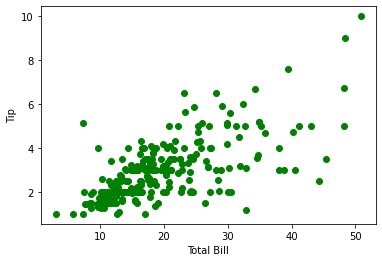

In [19]:
SortIndex=bill.argsort(0)
xsort=bill[SortIndex]

plt.scatter(bill,tip,color='green')

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

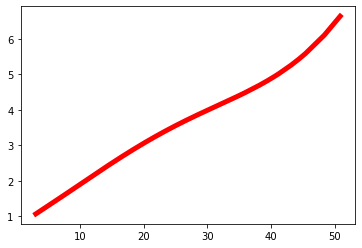

In [20]:
plt.plot(xsort,ypred[SortIndex] ,color ='red',linewidth=5)

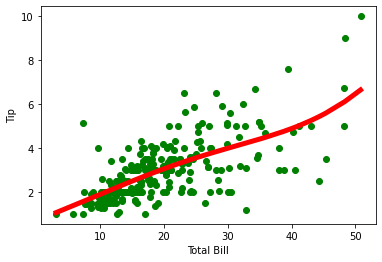

In [21]:
plt.scatter(bill,tip,color='green')
plt.plot(xsort,ypred[SortIndex],color='red',linewidth=5)

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()